# Importing Libraries and Loading Dataset

In [162]:
# Importing Libraries and Loading Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.inspection import permutation_importance

import time

# Load datasets
train_data = pd.read_csv('dataset/loan-10k.lrn.csv')
test_data = pd.read_csv('dataset/loan-10k.tes.csv')


# Dataset preprocessing


In [163]:
# Training Dataset
print("Training Dataset Information:")
print(train_data.info())
print("\nTraining Dataset Sample:")
print(train_data.head())

# Test Dataset
print("\nTest Dataset Information:")
print(test_data.info())
print("\nTest Dataset Sample:")
print(test_data.head())

Training Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10000 non-null  int64  
 1   loan_amnt                   10000 non-null  float64
 2   funded_amnt                 10000 non-null  float64
 3   funded_amnt_inv             10000 non-null  float64
 4   term                        10000 non-null  object 
 5   int_rate                    10000 non-null  float64
 6   installment                 10000 non-null  float64
 7   emp_length                  10000 non-null  object 
 8   home_ownership              10000 non-null  object 
 9   annual_inc                  10000 non-null  float64
 10  verification_status         10000 non-null  object 
 11  loan_status                 10000 non-null  object 
 12  pymnt_plan                  10000 non-null  object 
 13  pu

# Vizualisation 


Selected Top Numerical Features Based on Variance:
Index(['tot_hi_cred_lim', 'tot_cur_bal', 'annual_inc', 'total_bal_ex_mort',
       'total_il_high_credit_limit', 'total_rev_hi_lim', 'total_bc_limit',
       'revol_bal', 'bc_open_to_buy', 'avg_cur_bal'],
      dtype='object')
Statistical Summary of Top Numerical Features:


,tot_hi_cred_lim,tot_cur_bal,annual_inc,total_bal_ex_mort,total_il_high_credit_limit,total_rev_hi_lim,total_bc_limit,revol_bal,bc_open_to_buy,avg_cur_bal
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,1.914525e+05,1.541102e+05,8.212897e+04,5.535178e+04,48294.371800,3.574960e+04,2.423097e+04,16977.031900,12028.534000,14118.518000
std,1.846940e+05,1.660660e+05,6.769284e+04,5.243803e+04,46981.179499,3.565504e+04,2.539548e+04,23574.688283,16664.058967,16543.350515
min,2.700000e+03,0.000000e+00,5.000000e+03,0.000000e+00,0.000000,5.000000e+02,2.000000e+02,0.000000,0.000000,0.000000
25%,5.774125e+04,3.381850e+04,5.000000e+04,2.424650e+04,18881.250000,1.540000e+04,8.800000e+03,6208.500000,1792.750000,3431.750000
50%,1.298690e+05,9.370650e+04,7.000000e+04,4.151350e+04,36533.500000,2.660000e+04,1.710000e+04,11844.000000,5982.500000,8049.500000
75%,2.752100e+05,2.279442e+05,9.700000e+04,6.880825e+04,63500.500000,4.482500e+04,3.140000e+04,20702.500000,15493.250000,19467.750000
max,2.532616e+06,2.147961e+06,3.200000e+06,1.226094e+06,768775.000000,1.090700e+06,1.090700e+06,988767.000000,213211.000000,267667.000000


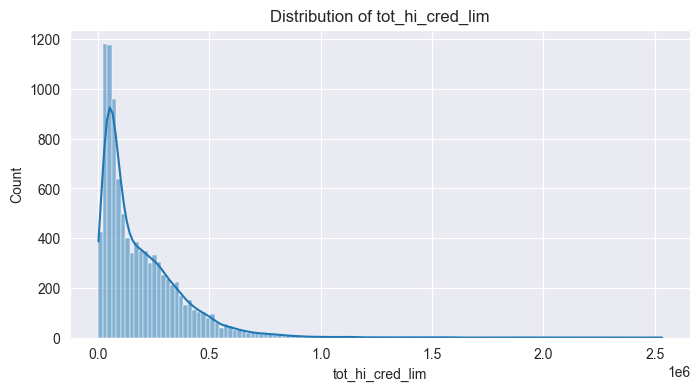

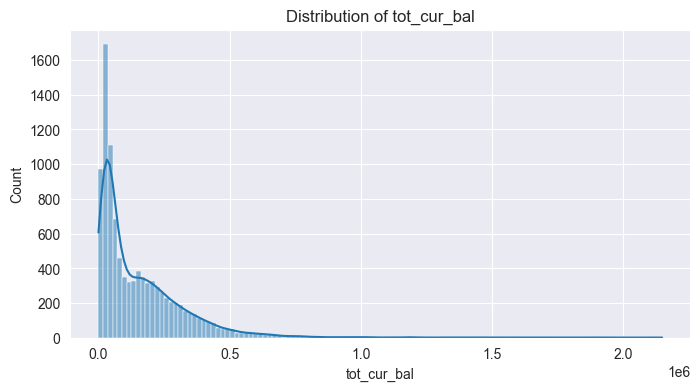

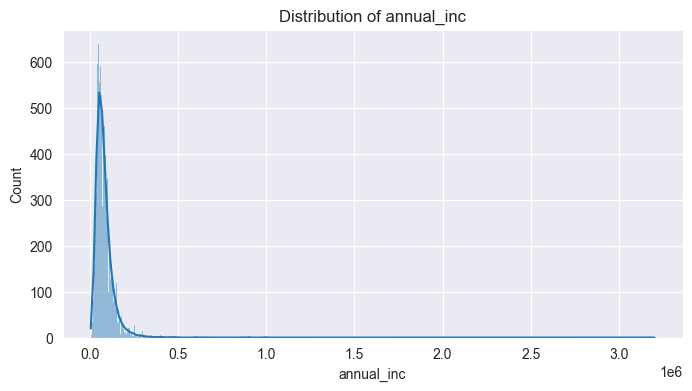

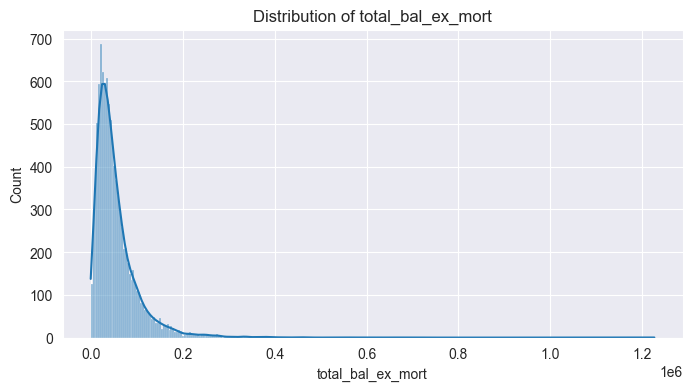

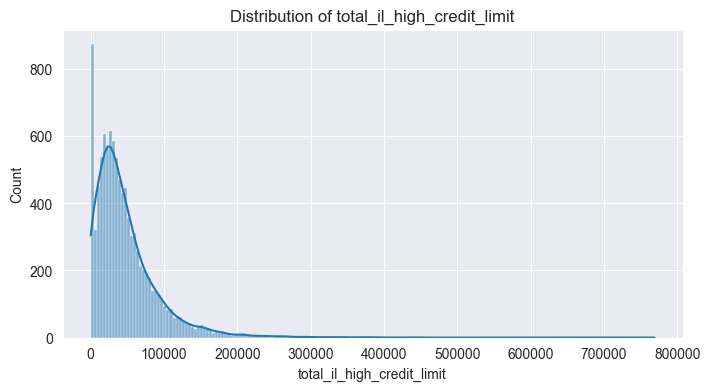

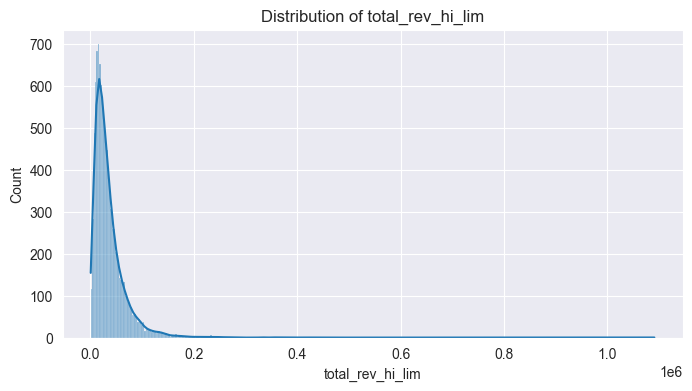

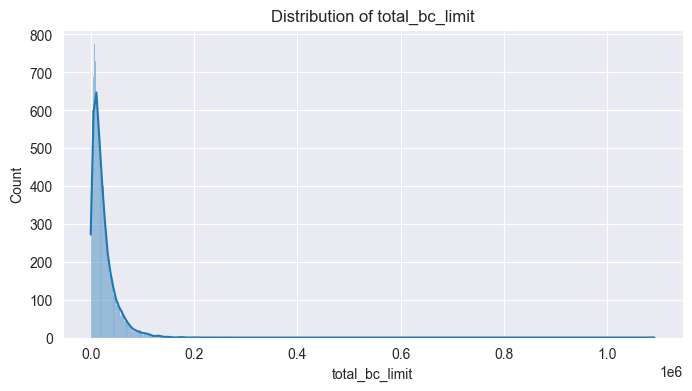

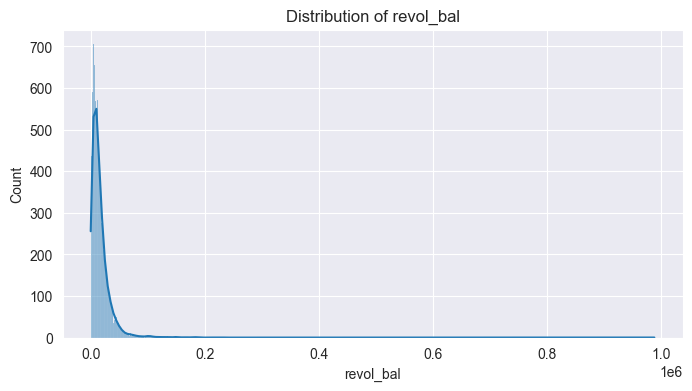

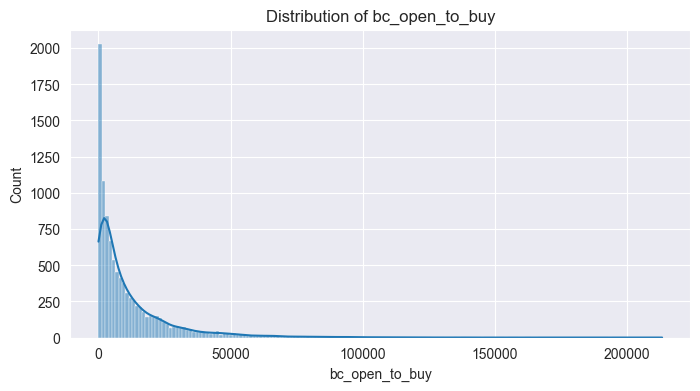

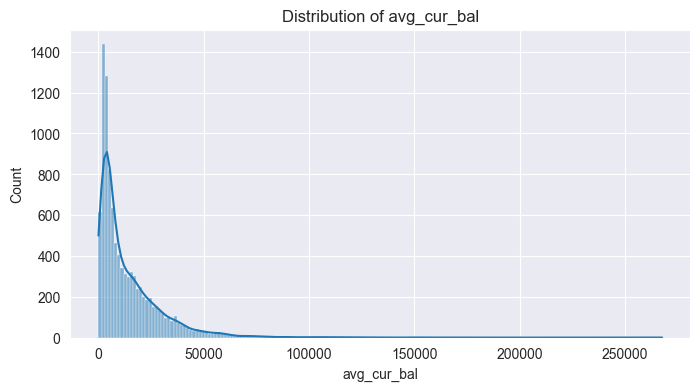

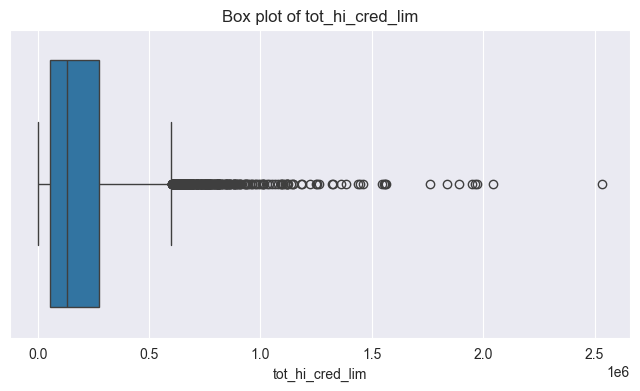

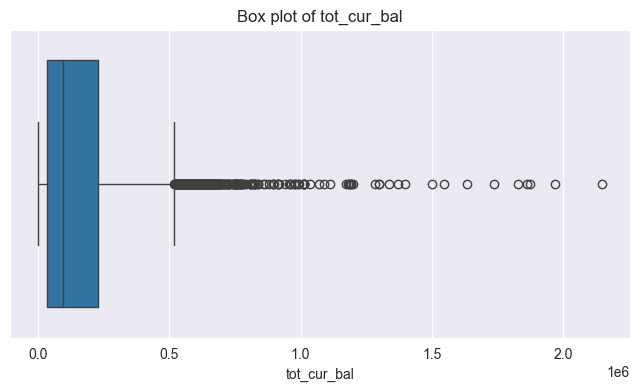

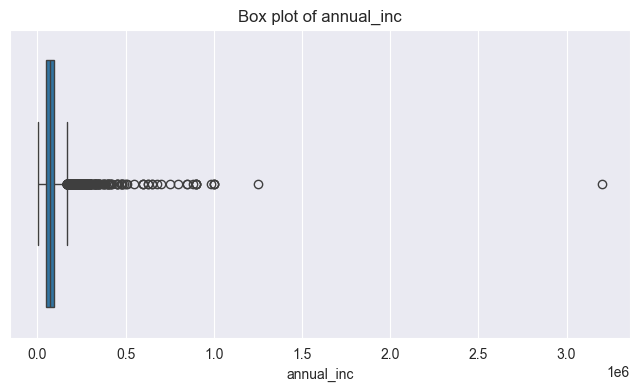

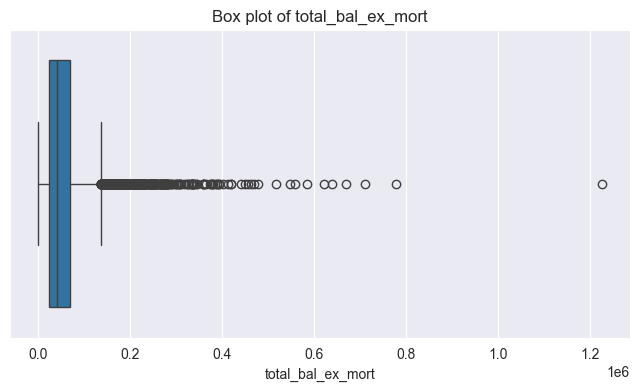

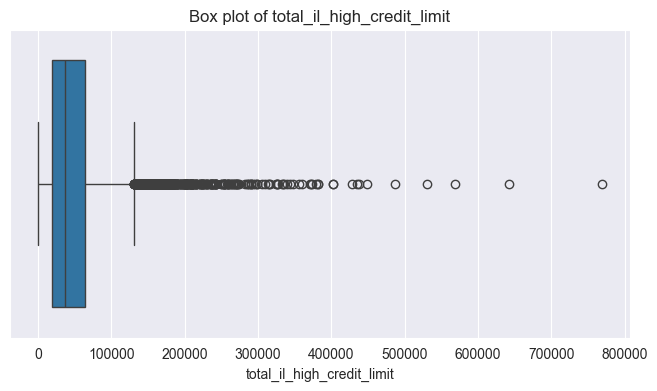

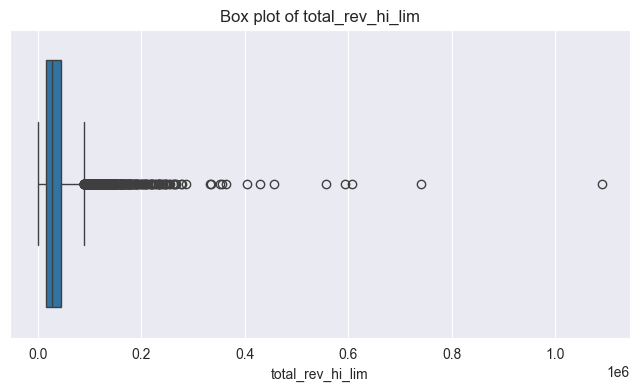

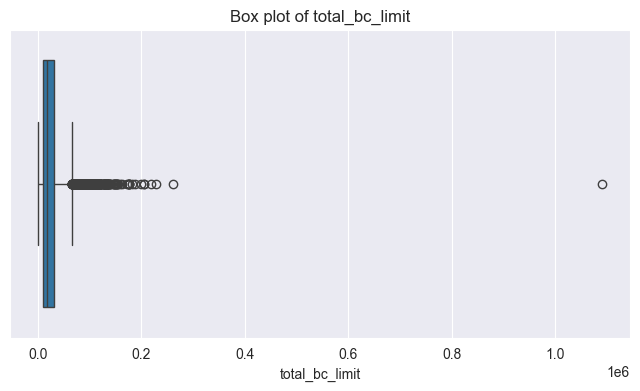

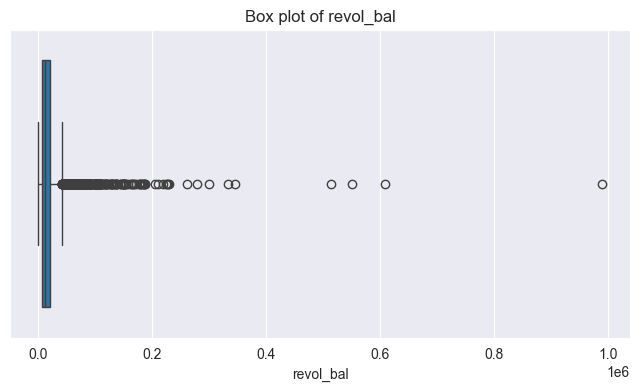

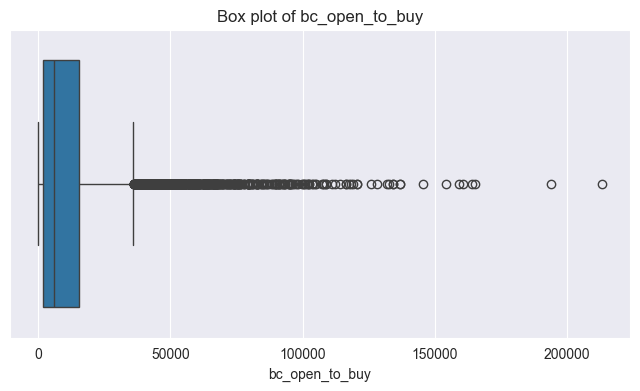

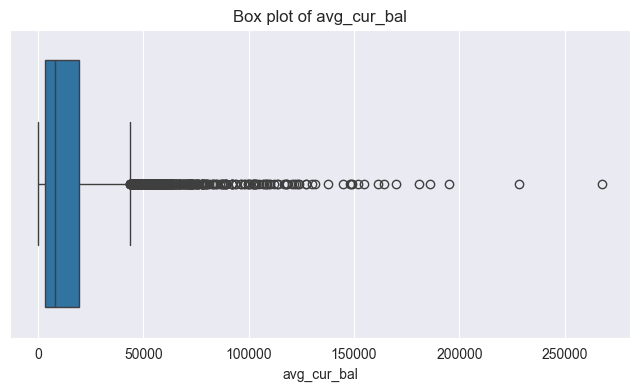

Selected Top Categorical Features Based on Unique Values:
Index(['addr_state', 'purpose', 'emp_length', 'loan_status', 'home_ownership',
       'verification_status', 'term', 'pymnt_plan', 'initial_list_status',
       'application_type'],
      dtype='object')


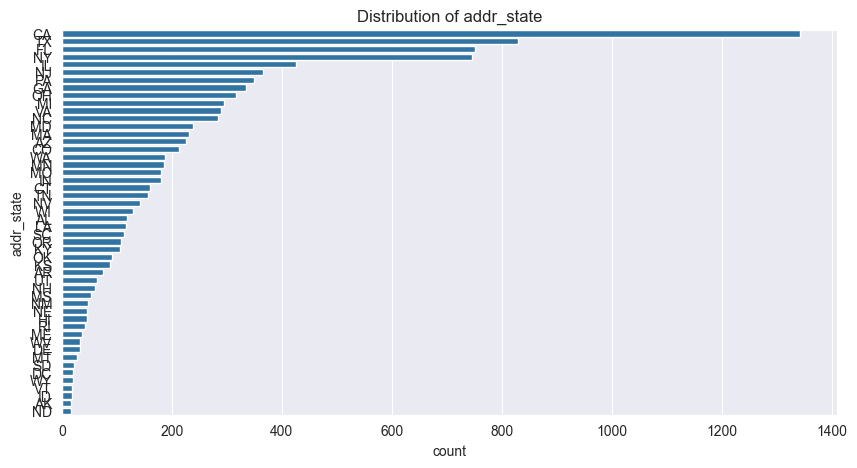

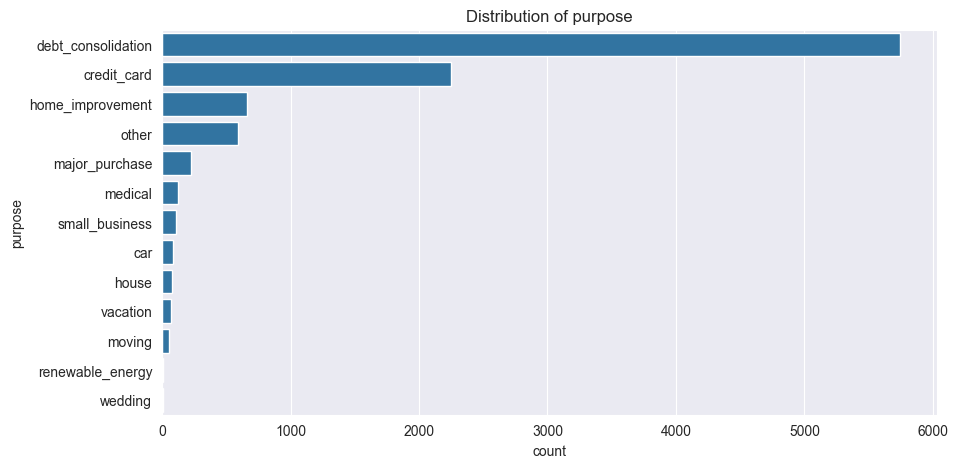

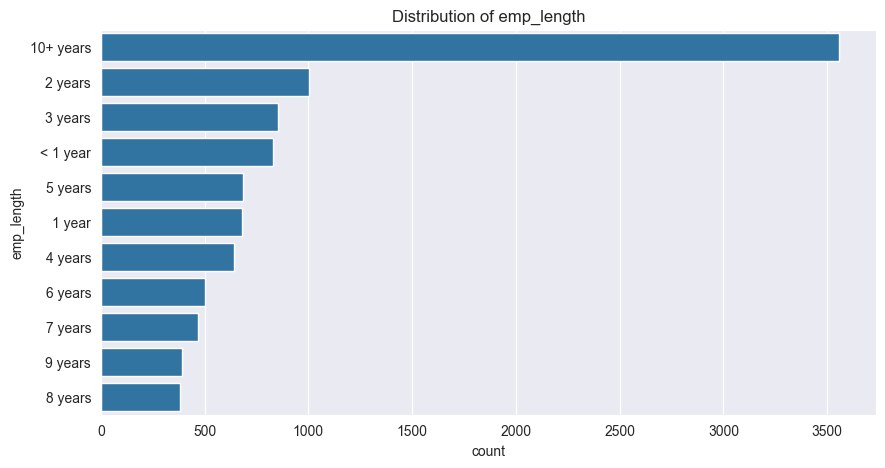

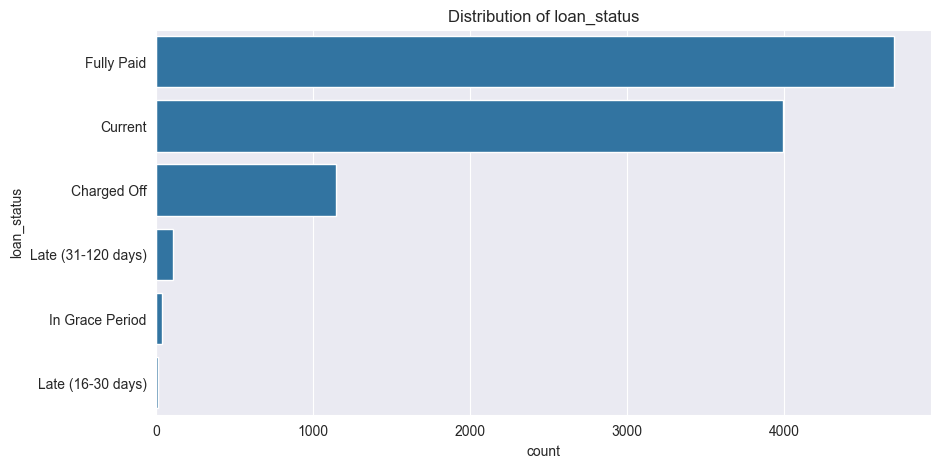

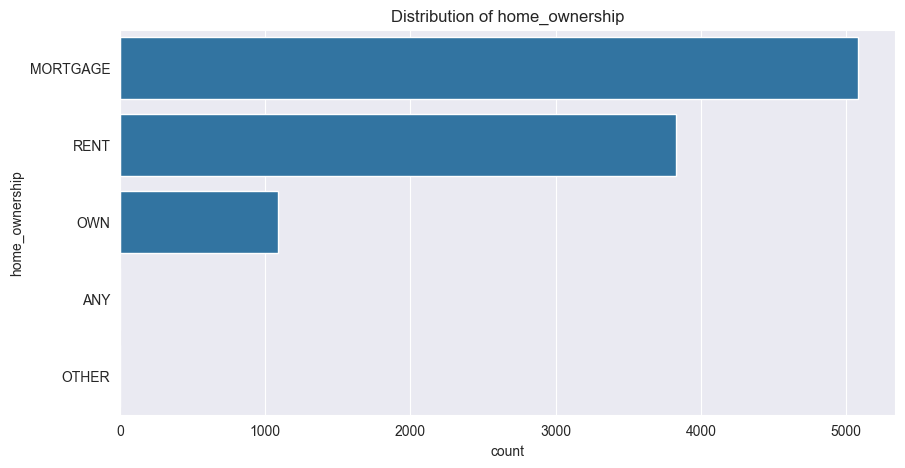

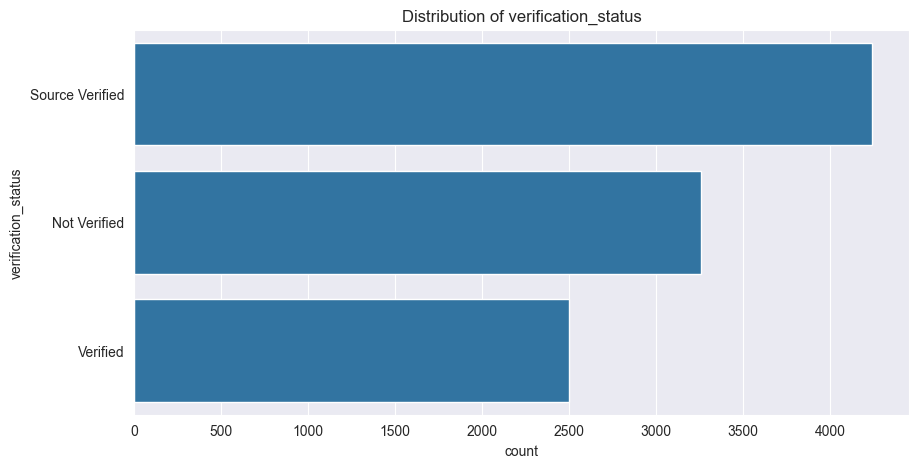

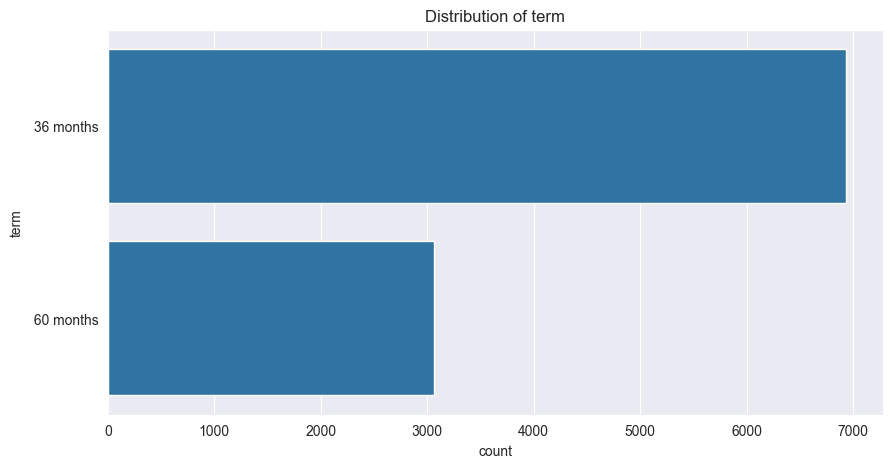

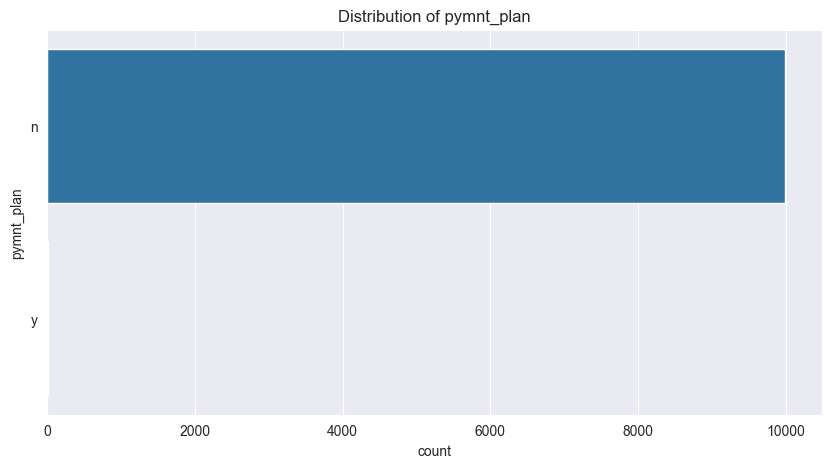

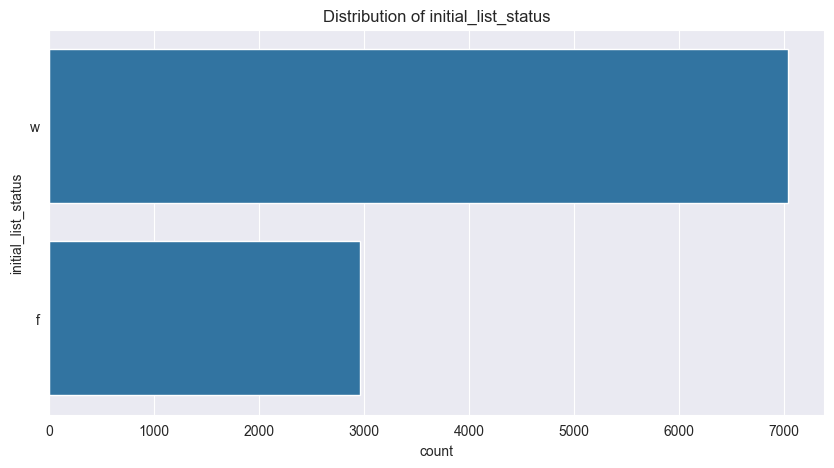

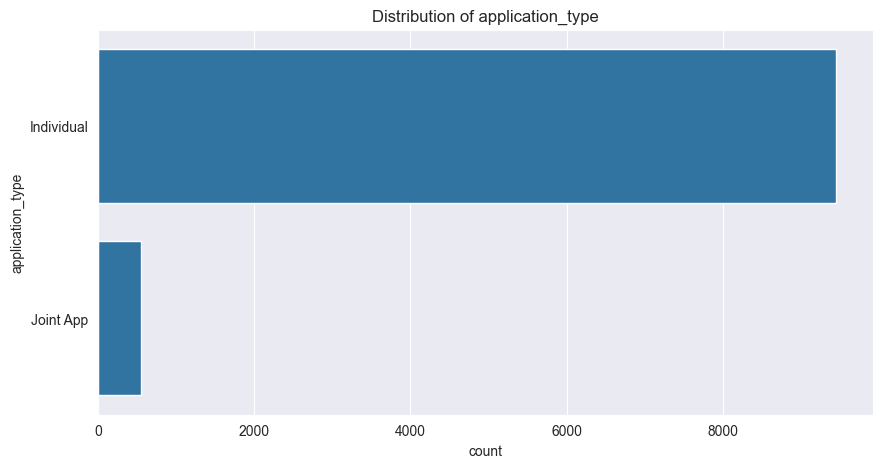

In [181]:
# Identify numeric and categorical features
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data.select_dtypes(exclude=['int64', 'float64']).columns

# Optionally, you can remove the target variable if it's included
target_col = 'grade'
if target_col in numeric_features:
    numeric_features = numeric_features.drop(target_col)
if target_col in categorical_features:
    categorical_features = categorical_features.drop(target_col)
    
numeric_features = numeric_features.drop('ID')

# Select top numerical features based on variance
variance = train_data[numeric_features].var().sort_values(ascending=False)
top_numeric_features = variance.index[:10]

print("Selected Top Numerical Features Based on Variance:")
print(top_numeric_features)

# Statistical summaries for top numerical features
print("Statistical Summary of Top Numerical Features:")
display(train_data[top_numeric_features].describe())

# Histograms/Density Plots for Top Numerical Features
for feature in top_numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Box Plots for Top Numerical Features
for feature in top_numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_data[feature].dropna())
    plt.title(f'Box plot of {feature}')
    plt.show()

# Select top categorical features based on number of unique values
unique_counts = train_data[categorical_features].nunique().sort_values(ascending=False)
top_categorical_features = unique_counts.index[:10]

print("Selected Top Categorical Features Based on Unique Values:")
print(top_categorical_features)

# Analysis of Top Categorical Features
for feature in top_categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=train_data[feature], order=train_data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()


# Data preprocessing and vizualization

In [182]:
# Handle missing columns in test data
missing_columns = set(train_data.columns) - set(test_data.columns)
if missing_columns:
    print(f"\nMissing columns in test dataset: {missing_columns}")
    for col in missing_columns:
        test_data[col] = np.nan  

# Drop extra columns in test data
extra_columns = set(test_data.columns) - set(train_data.columns)
if extra_columns:
    print(f"\nExtra columns in test dataset: {extra_columns}")
    test_data = test_data.drop(columns=extra_columns)

# Separate target variable
target_col = 'grade'
X_train = train_data.drop(columns=[target_col])
y_train = train_data[target_col]
X_test = test_data  # Assuming 'grade' is not in test_data

# Encode target variable
label_enc = LabelEncoder()
y_train_encoded = label_enc.fit_transform(y_train)

# Identify numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# Define preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


KeyError: "['ID'] not found in axis"

# Training the model by descision tree

In [166]:
# Function to train and evaluate models
def train_and_evaluate(model, param_grid, X_train, y_train, model_name):
    # Create pipeline
    clf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Hyperparameter tuning using RandomizedSearchCV
    random_search = RandomizedSearchCV(clf_pipeline, param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    
    # Best estimator
    best_model = random_search.best_estimator_
    
    # Cross-validation scores
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    
    print(f"\n{model_name} Best Parameters: {random_search.best_params_}")
    print(f"{model_name} Cross-validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
    
    return best_model, random_search.cv_results_, cv_scores


# Descision tree training 

In [167]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid_dt = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Train and evaluate
best_dt_model, dt_results, cv_scores_dt = train_and_evaluate(dt_model, param_grid_dt, X_train, y_train_encoded, "Decision Tree")



Decision Tree Best Parameters: {'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 10}
Decision Tree Cross-validation Accuracy: 0.99 ± 0.00


# logistic regression training

In [168]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Define hyperparameter grid
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'saga'],
    'classifier__multi_class': ['auto', 'ovr', 'multinomial']
}

# Train and evaluate
best_lr_model, lr_results, cv_scores_lr = train_and_evaluate(lr_model, param_grid_lr, X_train, y_train_encoded, "Logistic Regression")


/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/


Logistic Regression Best Parameters: {'classifier__solver': 'lbfgs', 'classifier__penalty': 'l2', 'classifier__multi_class': 'auto', 'classifier__C': 10}
Logistic Regression Cross-validation Accuracy: 0.87 ± 0.01


KNN training

In [169]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()

# Define hyperparameter grid
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# Train and evaluate
best_knn_model, knn_results, cv_scores_knn = train_and_evaluate(knn_model, param_grid_knn, X_train, y_train_encoded, "KNN")

/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



KNN Best Parameters: {'classifier__weights': 'distance', 'classifier__n_neighbors': 9, 'classifier__metric': 'manhattan'}
KNN Cross-validation Accuracy: 0.49 ± 0.01


# Evaluation on holdout

In [171]:
# Split data for holdout validation
X_train_split, X_eval, y_train_split, y_eval = train_test_split(X_train, y_train_encoded, test_size=0.3, random_state=42)

# Function to evaluate model on holdout set
def evaluate_holdout(model, X_train, y_train, X_eval, y_eval, model_name):
    # Fit the model on training split
    model.fit(X_train, y_train)
    
    # Predict on evaluation set
    y_pred = model.predict(X_eval)
    
    # Metrics
    accuracy = accuracy_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred, average='macro')
    recall = recall_score(y_eval, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_eval, y_pred)
    
    print(f"\n{model_name} Holdout Accuracy: {accuracy:.2f}")
    print(f"{model_name} Holdout Precision: {precision:.2f}")
    print(f"{model_name} Holdout Recall: {recall:.2f}")
    print(f"{model_name} Confusion Matrix:\n{conf_matrix}")
    
    # Confusion matrix visualization
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_enc.classes_,
                yticklabels=label_enc.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    return accuracy, precision, recall



Decision Tree Holdout Accuracy: 0.99
Decision Tree Holdout Precision: 0.96
Decision Tree Holdout Recall: 0.97
Decision Tree Confusion Matrix:
[[533   8   0   0   0   0   0]
 [  5 858   0   0   0   0   0]
 [  0   7 885   1   0   0   0]
 [  1   0   3 437   0   0   0]
 [  0   0   0   6 185   7   0]
 [  0   0   0   0   2  42   2]
 [  0   0   0   0   0   0  18]]


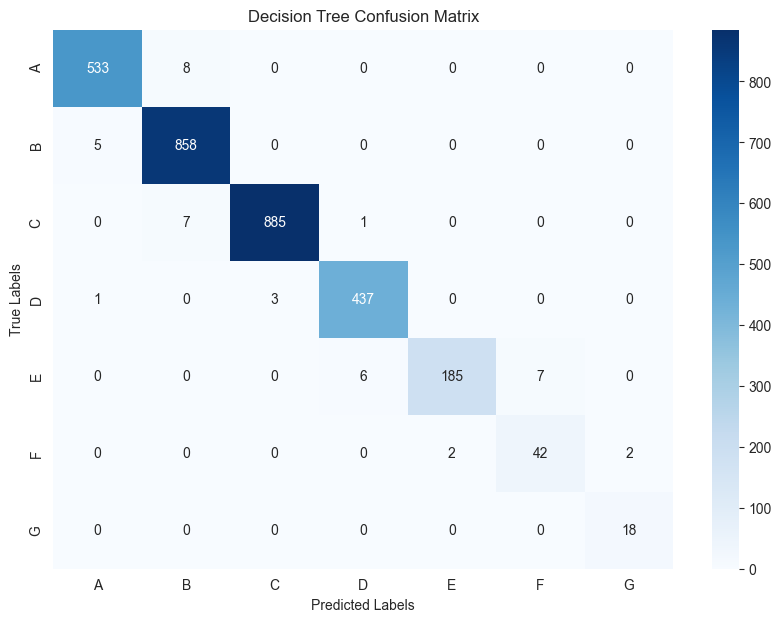

/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Holdout Accuracy: 0.86
Logistic Regression Holdout Precision: 0.72
Logistic Regression Holdout Recall: 0.74
Logistic Regression Confusion Matrix:
[[499  42   0   0   0   0   0]
 [ 43 767  53   0   0   0   0]
 [  0  57 793  41   2   0   0]
 [  0   1  40 369  31   0   0]
 [  0   0   0  64 114  16   4]
 [  0   0   0   0  13  22  11]
 [  0   0   0   0   0   8  10]]


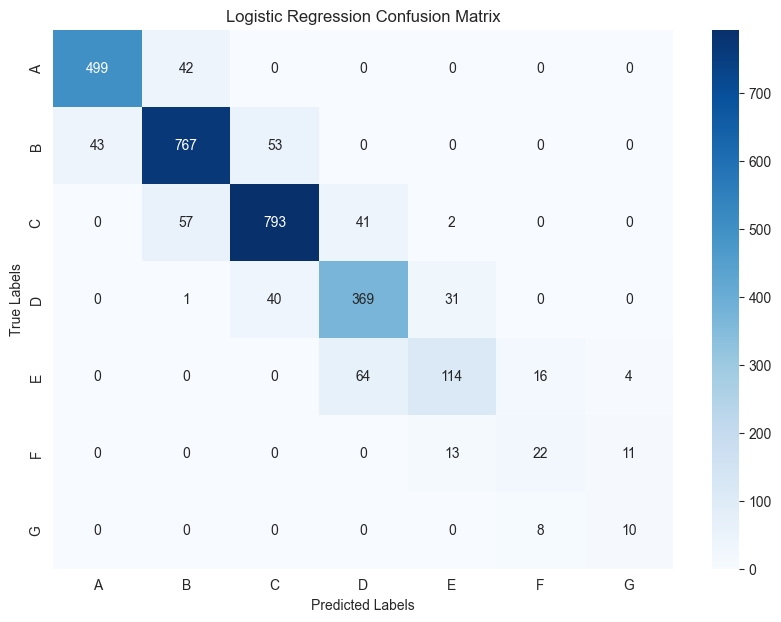

/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



KNN Holdout Accuracy: 0.49
KNN Holdout Precision: 0.44
KNN Holdout Recall: 0.31
KNN Confusion Matrix:
[[355 155  31   0   0   0   0]
 [155 465 227  16   0   0   0]
 [ 39 287 500  64   3   0   0]
 [ 11  47 262 112   9   0   0]
 [  1  29  89  55  23   1   0]
 [  0   1  18  14  11   2   0]
 [  0   0   7   8   3   0   0]]


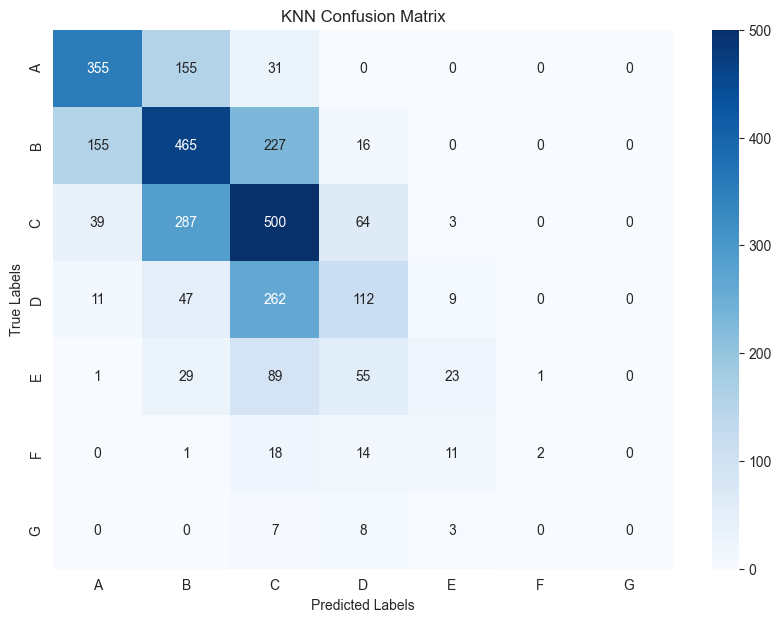

In [172]:
# Evaluate Decision Tree on holdout set
dt_holdout_accuracy, dt_holdout_precision, dt_holdout_recall = evaluate_holdout(best_dt_model, X_train_split, y_train_split, X_eval, y_eval, "Decision Tree")

# Evaluate Logistic Regression on holdout set
lr_holdout_accuracy, lr_holdout_precision, lr_holdout_recall = evaluate_holdout(best_lr_model, X_train_split, y_train_split, X_eval, y_eval, "Logistic Regression")

# Evaluate KNN on holdout set
knn_holdout_accuracy, knn_holdout_precision, knn_holdout_recall = evaluate_holdout(best_knn_model, X_train_split, y_train_split, X_eval, y_eval, "KNN")


# Feature importance

In [173]:
def get_feature_names(fitted_preprocessor):
    # Get feature names from numerical columns
    num_features = numeric_features
    # Access the fitted OneHotEncoder
    cat_encoder = fitted_preprocessor.named_transformers_['cat'].named_steps['onehot']
    # Get feature names from one-hot encoder
    cat_features = cat_encoder.get_feature_names_out(categorical_features)
    # Combine feature names
    return np.concatenate([num_features, cat_features])


# Get feature names
fitted_preprocessor = best_dt_model.named_steps['preprocessor']

# Get feature names using the fitted preprocessor
feature_names = get_feature_names(fitted_preprocessor)

# Display the feature names
print("Feature Names After Preprocessing:")
print(feature_names)


Feature Names After Preprocessing:
['ID' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'int_rate' 'installment'
 'annual_inc' 'dti' 'delinq_2yrs' 'fico_range_low' 'fico_range_high'
 'inq_last_6mths' 'open_acc' 'pub_rec' 'revol_bal' 'revol_util'
 'total_acc' 'out_prncp' 'out_prncp_inv' 'total_pymnt' 'total_pymnt_inv'
 'total_rec_prncp' 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_amnt' 'last_fico_range_high'
 'last_fico_range_low' 'collections_12_mths_ex_med' 'policy_code'
 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal' 'total_rev_hi_lim'
 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy' 'bc_util'
 'chargeoff_within_12_mths' 'delinq_amnt' 'mo_sin_old_il_acct'
 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op' 'mo_sin_rcnt_tl'
 'mort_acc' 'mths_since_recent_bc' 'mths_since_recent_inq'
 'num_accts_ever_120_pd' 'num_actv_bc_tl' 'num_actv_rev_tl' 'num_bc_sats'
 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl' 'num_rev_accts'
 'num_rev_tl_bal_gt_0' 'num_sats

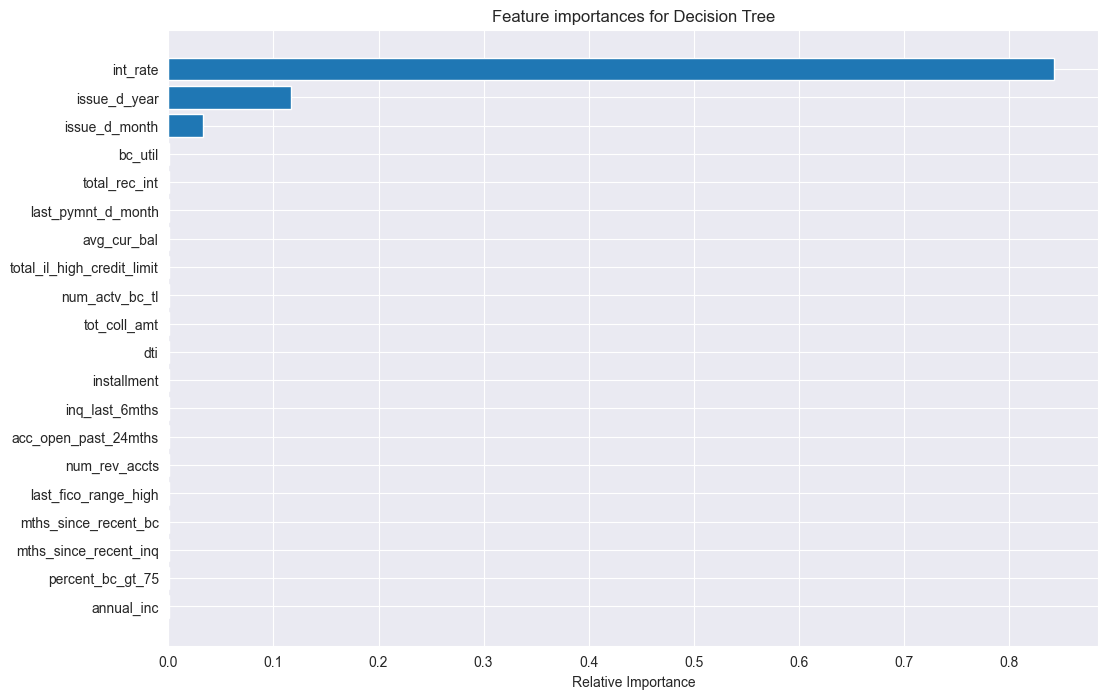

In [174]:
# Feature importance for Decision Tree
importances_dt = best_dt_model.named_steps['classifier'].feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]

# Plot the top N feature importances
n_top_features = 20
plt.figure(figsize=(12, 8))
plt.title("Feature importances for Decision Tree")
plt.barh(range(n_top_features), importances_dt[indices_dt][:n_top_features], align='center')
plt.yticks(range(n_top_features), [feature_names[i] for i in indices_dt[:n_top_features]])
plt.gca().invert_yaxis()  # Reverse the order to show the most important at the top
plt.xlabel("Relative Importance")
plt.show()


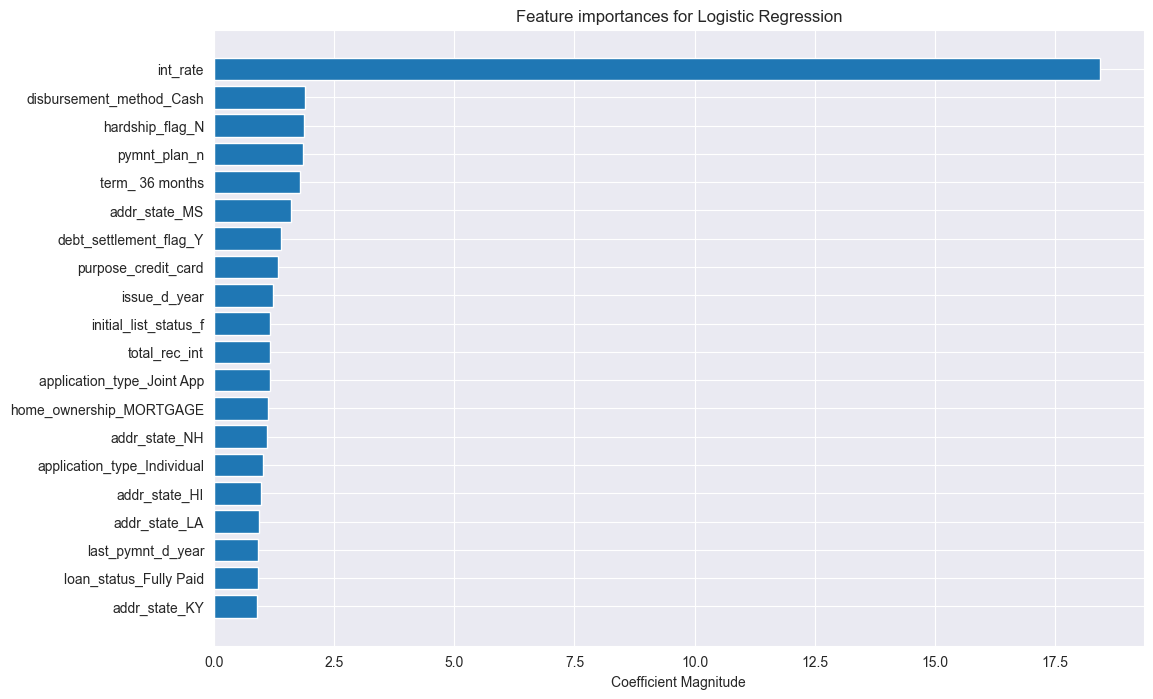

In [175]:
# Feature importance for Logistic Regression
coefficients = np.abs(best_lr_model.named_steps['classifier'].coef_)
feature_importance_lr = np.mean(coefficients, axis=0)
indices_lr = np.argsort(feature_importance_lr)[::-1]

# Plot the top N feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature importances for Logistic Regression")
plt.barh(range(n_top_features), feature_importance_lr[indices_lr][:n_top_features], align='center')
plt.yticks(range(n_top_features), [feature_names[i] for i in indices_lr[:n_top_features]])
plt.gca().invert_yaxis()
plt.xlabel("Coefficient Magnitude")
plt.show()


Elapsed time to compute permutation importances: 86.937 seconds


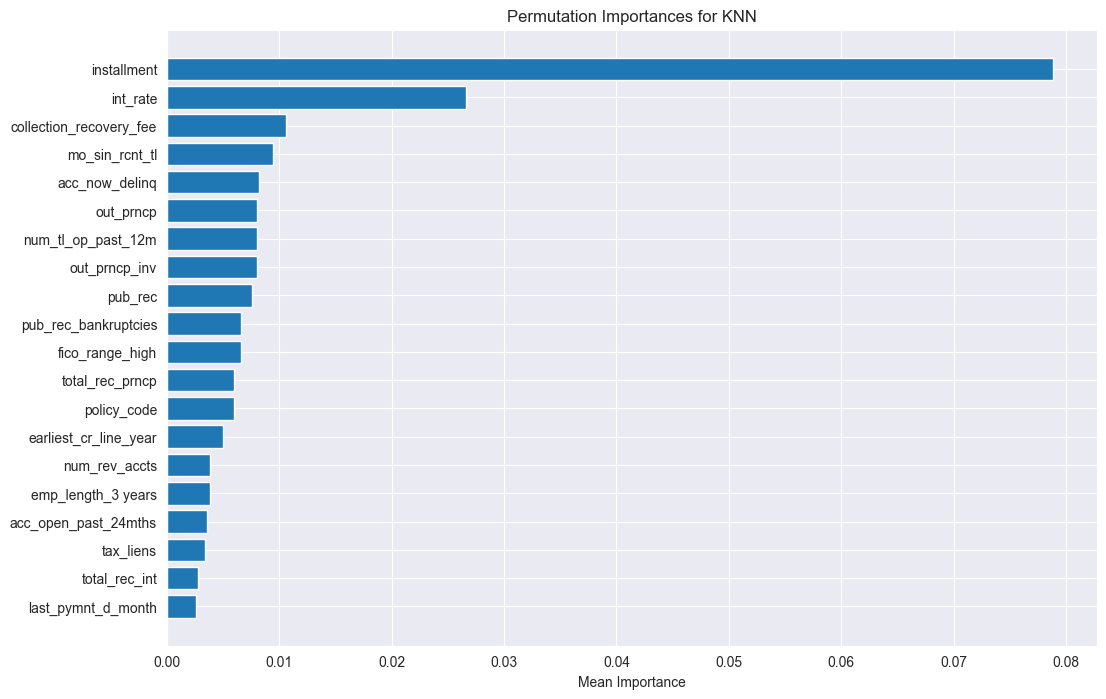

In [176]:
# Feature importance for KNN using permutation importance
# Limiting to a subset to improve computation time
subset_size = 1000
X_subset = X_train.sample(n=subset_size, random_state=42)
y_subset = y_train_encoded[X_subset.index]

start_time = time.time()
result = permutation_importance(best_knn_model, X_subset, y_subset, n_repeats=5, random_state=42, n_jobs=-1)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute permutation importances: {elapsed_time:.3f} seconds")

importances_knn = result.importances_mean
indices_knn = np.argsort(importances_knn)[::-1]

# Plot the top N feature importances
plt.figure(figsize=(12, 8))
plt.title("Permutation Importances for KNN")
plt.barh(range(n_top_features), importances_knn[indices_knn][:n_top_features], align='center')
plt.yticks(range(n_top_features), [feature_names[i] for i in indices_knn[:n_top_features]])
plt.gca().invert_yaxis()
plt.xlabel("Mean Importance")
plt.show()


# Comparison Between Classifiers

,Classifier,Holdout Accuracy,Cross-Validation Accuracy,Holdout Precision,Holdout Recall
0,Decision Tree,0.986000,0.9885,0.956999,0.972682
1,Logistic Regression,0.858000,0.8705,0.724229,0.735065
2,KNN,0.485667,0.4932,0.442670,0.309790


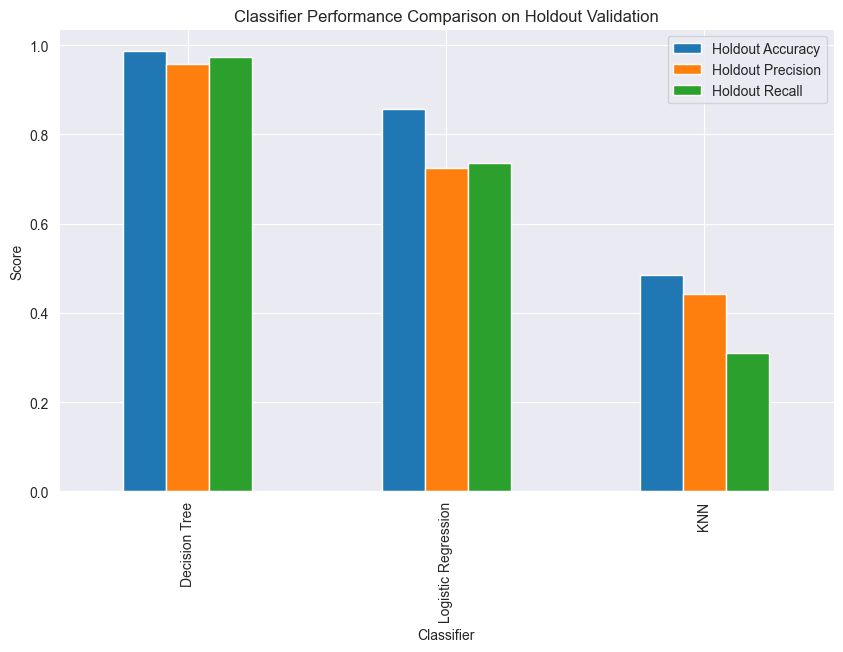

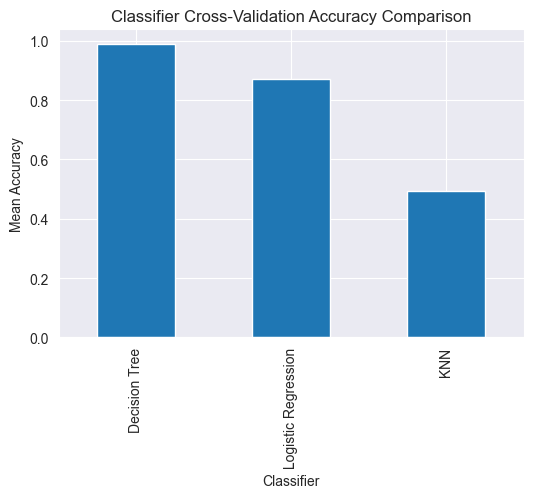

In [177]:
# Create performance summary DataFrame
performance_summary = pd.DataFrame({
    'Classifier': ['Decision Tree', 'Logistic Regression', 'KNN'],
    'Holdout Accuracy': [dt_holdout_accuracy, lr_holdout_accuracy, knn_holdout_accuracy],
    'Cross-Validation Accuracy': [cv_scores_dt.mean(), cv_scores_lr.mean(), cv_scores_knn.mean()],
    'Holdout Precision': [dt_holdout_precision, lr_holdout_precision, knn_holdout_precision],
    'Holdout Recall': [dt_holdout_recall, lr_holdout_recall, knn_holdout_recall]
})

display(performance_summary)

# Plotting the performance metrics
metrics = ['Holdout Accuracy', 'Holdout Precision', 'Holdout Recall']
performance_summary.set_index('Classifier')[metrics].plot(kind='bar', figsize=(10, 6))
plt.title('Classifier Performance Comparison on Holdout Validation')
plt.ylabel('Score')
plt.show()

# Plot Cross-Validation Accuracy
performance_summary.set_index('Classifier')['Cross-Validation Accuracy'].plot(kind='bar', figsize=(6, 4))
plt.title('Classifier Cross-Validation Accuracy Comparison')
plt.ylabel('Mean Accuracy')
plt.show()


# Hyperparameter Effects

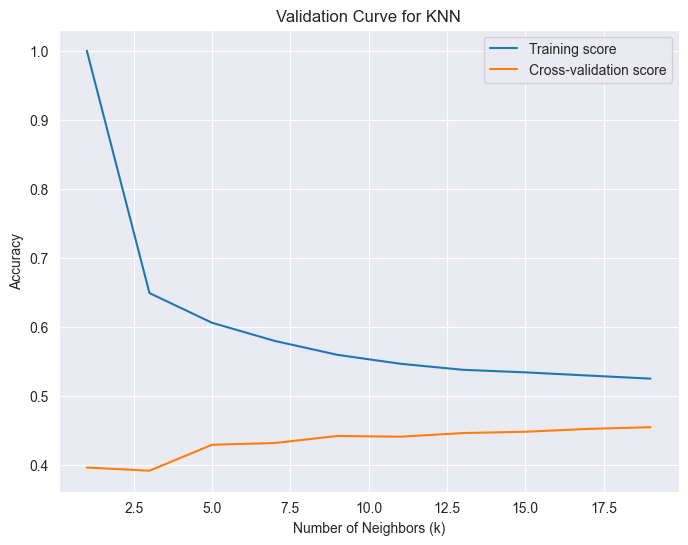

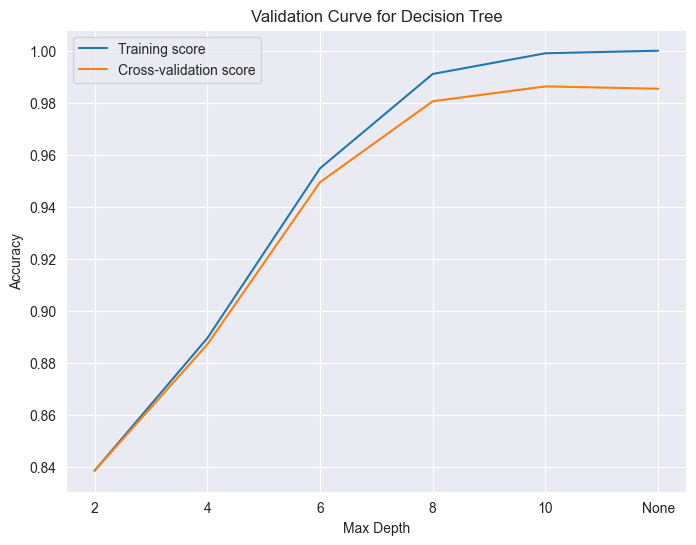

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve

# Define the pipeline for KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# For KNN, vary n_neighbors using validation curve
param_range = range(1, 20, 2)
train_scores, test_scores = validation_curve(
    knn_pipeline, X_train, y_train_encoded, param_name='classifier__n_neighbors',
    param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_scores_mean, label='Training score')
plt.plot(param_range, test_scores_mean, label='Cross-validation score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for KNN')
plt.legend()
plt.show()

# Define the pipeline for Decision Tree
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# For Decision Tree, vary max_depth using validation curve
param_range = [2, 4, 6, 8, 10, None]
train_scores, test_scores = validation_curve(
    dt_pipeline, X_train, y_train_encoded, param_name='classifier__max_depth',
    param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Compute mean scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot([str(d) for d in param_range], train_scores_mean, label='Training score')
plt.plot([str(d) for d in param_range], test_scores_mean, label='Cross-validation score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Decision Tree')
plt.legend()
plt.show()


# Comparison of Holdout Validation and Cross-Validation


,Validation Method,Decision Tree Accuracy,Logistic Regression Accuracy,KNN Accuracy
0,Holdout,0.9860,0.8580,0.485667
1,Cross-Validation,0.9885,0.8705,0.493200


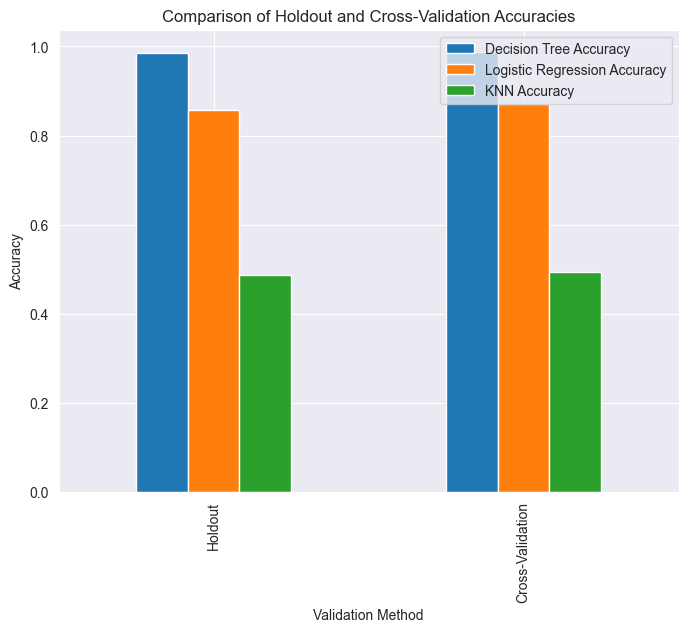

In [179]:
comparison_df = pd.DataFrame({
    'Validation Method': ['Holdout', 'Cross-Validation'],
    'Decision Tree Accuracy': [dt_holdout_accuracy, cv_scores_dt.mean()],
    'Logistic Regression Accuracy': [lr_holdout_accuracy, cv_scores_lr.mean()],
    'KNN Accuracy': [knn_holdout_accuracy, cv_scores_knn.mean()]
})
display(comparison_df)

# Plot the comparison
comparison_df.set_index('Validation Method')[['Decision Tree Accuracy', 'Logistic Regression Accuracy', 'KNN Accuracy']].plot(kind='bar', figsize=(8, 6))
plt.ylabel('Accuracy')
plt.title('Comparison of Holdout and Cross-Validation Accuracies')
plt.show()


# Performance Analysis

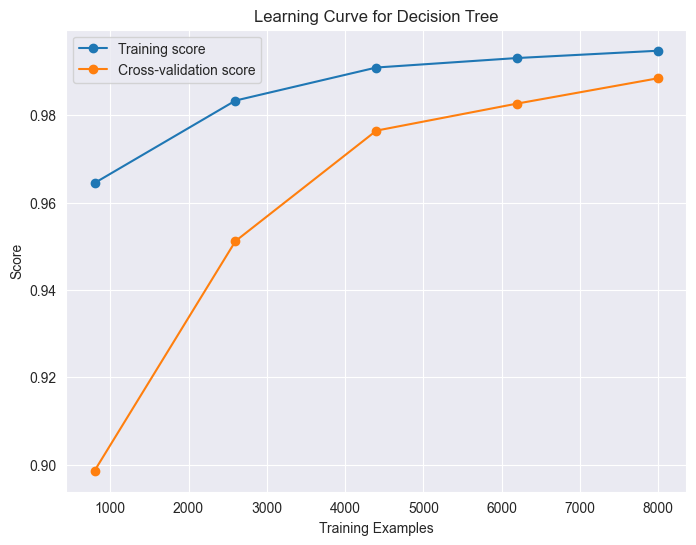

/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/volodic/PycharmProjects/ML-

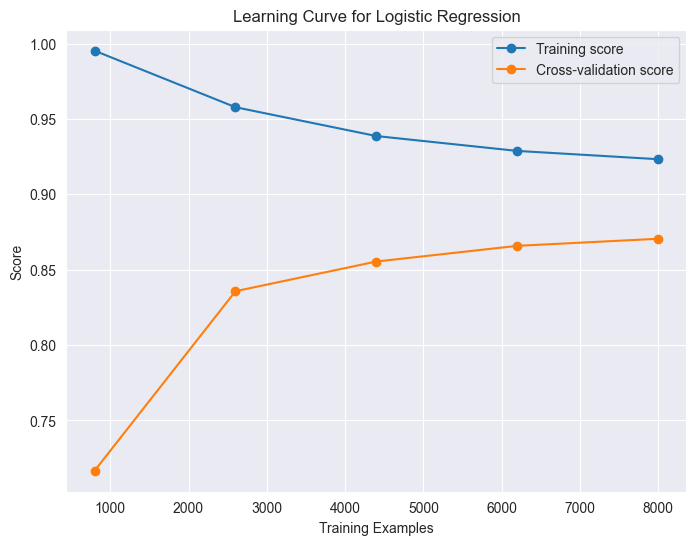

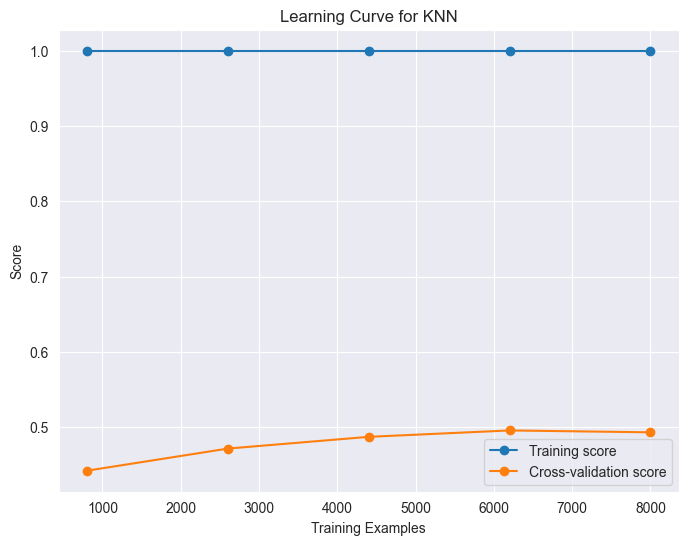

In [180]:
# Using learning curves to analyze performance with increasing dataset size
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, 5)

# Decision Tree Learning Curve
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(
    best_dt_model, X_train, y_train_encoded, cv=5, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

train_scores_mean_dt = np.mean(train_scores_dt, axis=1)
test_scores_mean_dt = np.mean(test_scores_dt, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_dt, train_scores_mean_dt, 'o-', label="Training score")
plt.plot(train_sizes_dt, test_scores_mean_dt, 'o-', label="Cross-validation score")
plt.title('Learning Curve for Decision Tree')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()

# Logistic Regression Learning Curve
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    best_lr_model, X_train, y_train_encoded, cv=5, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_lr, train_scores_mean_lr, 'o-', label="Training score")
plt.plot(train_sizes_lr, test_scores_mean_lr, 'o-', label="Cross-validation score")
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()

# KNN Learning Curve
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(
    best_knn_model, X_train, y_train_encoded, cv=5, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

train_scores_mean_knn = np.mean(train_scores_knn, axis=1)
test_scores_mean_knn = np.mean(test_scores_knn, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', label="Training score")
plt.plot(train_sizes_knn, test_scores_mean_knn, 'o-', label="Cross-validation score")
plt.title('Learning Curve for KNN')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()


In [ ]:
# Prepare predictions for submission
# Predict on test data using the best model (e.g., Logistic Regression)
final_predictions = best_lr_model.predict(test_data)

# Decode predictions to original labels
final_predictions_labels = label_enc.inverse_transform(final_predictions)

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_data['ID'],
    'Grade': final_predictions_labels
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created for Kaggle competition.")
